In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1Ka7fNnL71IH-BV010DhTLU9Drlmqt3o9'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('rumour.npy')  
file_dict = np.load('rumour.npy',allow_pickle=True)

link1 = 'https://drive.google.com/open?id=1KaglTR_T2tQcxsHl5jSuXtmlcWJTk4ZY'
fluff1, id1 = link1.split('=')
print (id1) # Verify that you have everything after '='
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('fakenews.npy')  
file_dict1 = np.load('fakenews.npy',allow_pickle=True)

1Ka7fNnL71IH-BV010DhTLU9Drlmqt3o9
1KaglTR_T2tQcxsHl5jSuXtmlcWJTk4ZY


In [0]:
out1Val = file_dict[:,1]
in1Val = file_dict[:,0]
print(in1Val.shape)
out2Val = file_dict1[:,1]
in2Val = file_dict1[:,0]
print(in2Val.shape)

(5331,)
(5000,)


In [0]:
def pad_along_axis(array: np.ndarray, target_length, axis=0):

    pad_size = target_length - array.shape[axis]
    axis_nb = len(array.shape)

    if pad_size < 0:
        return array[:target_length]
    npad = [(0, 0) for x in range(axis_nb)]
    npad[axis] = (0, pad_size)

    b = np.pad(array, pad_width=npad, mode='constant', constant_values=0)

    return b
  

shapes = [ar.shape[0] for ar in in1Val]
maxLeng1 =  np.max(shapes)
shapes = [ar.shape[0] for ar in in2Val]
maxLeng2 =  np.max(shapes)
maxLeng  = maxLeng1
if(maxLeng < maxLeng2):
  maxLeng = maxLeng2

In [0]:
timeSteps = 200

In [0]:
in2ValX = in1Val
temp = [pad_along_axis(in2ValAR, timeSteps, axis=0) for in2ValAR in in2ValX]
# in1Vali = [np.pad(in1ValAR, (0,maxLeng-in1ValAR.shape[0]), 'constant', constant_values=(0, 0)) for in1ValAR in in1ValX]
# shapes1 = [[ar.shape] for ar in in1Vali]
#print(shapes1)
in1Vali = np.array(temp)
print(in1Vali.shape)


(5331, 200, 300)


In [0]:
in1ValX = None
in1ValX = in2Val
temp = [pad_along_axis(in1ValAR, timeSteps, axis=0) for in1ValAR in in1ValX]
# in1Vali = [np.pad(in1ValAR, (0,maxLeng-in1ValAR.shape[0]), 'constant', constant_values=(0, 0)) for in1ValAR in in1ValX]
#print(shapes1)
in2Vali = np.array(temp)
print(in2Vali.shape)

(5000, 200, 300)


In [0]:
# print(np.unique(out1Val,return_counts=True))
out1Vali = [1 if val=='rumours' else 0 for val in out1Val]
out1Vali = np.array(out1Vali)
# print(np.unique(out1Vali,return_counts=True))

In [0]:
# print(np.unique(out2Val,return_counts=True))
def findInt(valu):
  if valu == 'agree':
    return np.array([1,0,0,0])
  elif valu == 'disagree':
    return np.array([0,1,0,0])
  elif valu == 'discuss':
    return np.array([0,0,1,0])
  else:
    return np.array([0,0,0,1])
out2Vali = [findInt(val) for val in out2Val]
out2Vali = np.array(out2Vali)
#print(out2Vali.shape,out2Val.shape,out2Val[0:5],out2Vali[0:5,:])

In [0]:
# from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
# Data = [[[(i+j)/100] for i in np.arange(5)] for j in np.arange(100)]
# target = [1 if (i%5)==0 else 0 for i in np.arange(100)]
# x_train = np.array(Data,dtype=float)
# y_train = np.array(target,dtype=float)
# # print(x_train,y_train)
# Data = [[[(i+j)/200] for i in np.arange(5)] for j in np.arange(100)]
# target = [1 if (i%5)==0 else 0 for i in np.arange(100)]
# x_test = np.array(Data,dtype=float)
# y_test = np.array(target,dtype=float)
# # print(x_test,y_test)
# # x_train,x_test,y_train,y_test = train_test_split(data,target,size=0.2,random_state=4)
# model=Sequential()
# model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=False))
# # model.add(Dense((1),activation='softmax'))
# model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
# model.summary()


Using TensorFlow backend.


In [0]:
# history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
# results = model.predict(x_test)
# plt.scatter(np.arange(100),results,c='r')
# plt.scatter(np.arange(100),y_test,c='g')
# plt.show()

# plt.plot(history.history['loss'])
# plt.show()

In [0]:

from keras.layers import Input,concatenate
from keras.models import Model
# define two sets of inputs
print
inputA = Input(shape=(None,300))
inputB = Input(shape=(None,300))
 
# the first branch operates on the first input
x1 = Dense(300, activation="linear")(inputA)
x1 = Model(inputs=inputA, outputs=x1)
 
# the second branch opreates on the second input

x2 = Dense(300, activation="linear")(inputB)
x2 = Model(inputs=inputB, outputs=x2)

combinedinput = concatenate([x1.output, x2.output])
# combinedinputDense = Dense(300, activation="linear")(combinedinput)
sharedLOut = GRU((300),return_sequences=True)(combinedinput)
# sharedLayerModel = Model(inputs=combinedinput, output=sharedLOut)

model1Input = concatenate([x1.output, sharedLOut])
model1Out = GRU((4),return_sequences=False)(model1Input)
# model1 = Model(inputs=model1Input, output=model1Out)


model2Input = concatenate([x2.output, sharedLOut])
model2Out = GRU((1),return_sequences=False)(model2Input)
# model2 = Model(inputs=model2Input, output=model2Out)
model = Model(input=[inputA,inputB], outputs=[model1Out,model2Out])
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mse', optimizer=optimizer)
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 300)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 300)    0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, None, 300)    90300       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, None, 300)    90300       input_2[0][0]                    
_____________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`


In [0]:
# history = {}
# results = {}
# for j in np.arange(10):
#   i = j
#   X2_train = in1Val[i]
#   Y2_train = out1Vali[i]
#   X2_train = X2_train.reshape(1,*X2_train.shape)
#   Y2_train = Y2_train.reshape(1,1)
#   X1_train = in2Val[i]
#   Y1_train = out2Vali[i]
#   X1_train = X1_train.reshape(1,*X1_train.shape)
#   Y1_train = Y1_train.reshape(1,*Y1_train.shape)
#   i = int(j/2)
#   X2_test = in1Val[i]
#   Y2_test = out1Vali[i]
#   X2_test = X2_test.reshape(1,*X2_test.shape)
#   Y2_test = Y2_test.reshape(1,1)
#   X1_test = in2Val[i]
#   Y1_test = out2Vali[i]
#   X1_test = X1_test.reshape(1,*X1_test.shape)
#   Y1_test = Y1_test.reshape(1,*Y1_test.shape)
# history = model.fit([X1_train,X2_train],[Y1_train,Y2_train],epochs=10,validation_data=([X1_test,X2_test],[Y1_test,Y2_test]))
# results = model.predict(x_test)
history = model.fit([in2Vali[0:4500],in1Vali[0:4500]],[out2Vali[0:4500],out1Vali[0:4500]],batch_size=100,epochs=100,validation_data=([in2Vali[4500:5000],in1Vali[4500:5000]],[out2Vali[4500:5000],out1Vali[4500:5000]]))


Instructions for updating:
Use tf.cast instead.
Train on 4500 samples, validate on 500 samples
Epoch 1/100
4500/4500 [==============================] - 199s 44ms/step - loss: 0.3644 - gru_2_loss: 0.1199 - gru_3_loss: 0.2445 - val_loss: 0.1737 - val_gru_2_loss: 0.1133 - val_gru_3_loss: 0.0604
Epoch 2/100
4500/4500 [==============================] - 185s 41ms/step - loss: 0.3404 - gru_2_loss: 0.1098 - gru_3_loss: 0.2305 - val_loss: 0.2676 - val_gru_2_loss: 0.1121 - val_gru_3_loss: 0.1555
Epoch 3/100
4500/4500 [==============================] - 185s 41ms/step - loss: 0.3395 - gru_2_loss: 0.1094 - gru_3_loss: 0.2301 - val_loss: 0.2364 - val_gru_2_loss: 0.1109 - val_gru_3_loss: 0.1254
Epoch 4/100
4500/4500 [==============================] - 185s 41ms/step - loss: 0.3390 - gru_2_loss: 0.1091 - gru_3_loss: 0.2299 - val_loss: 0.1962 - val_gru_2_loss: 0.1116 - val_gru_3_loss: 0.0846
Epoch 5/100
4500/4500 [==============================] - 184s 41ms/step - loss: 0.3387 - gru_2_loss: 0.1088 - gru

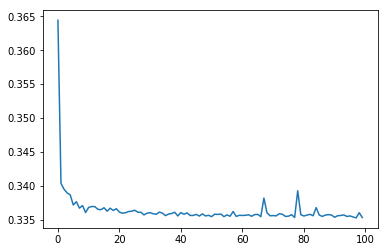

In [0]:
predicted = model.predict([in2Vali[4500:5000],in1Vali[4500:5000]])

plt.plot(history.history['loss'])
plt.show()

In [0]:
[predA,predB] = predicted
print(predA.shape,predB.shape)
actA,actB = out2Vali[4500:5000],out1Vali[4500:5000]
actB = actB.reshape(500,1)
print(actA.shape,actB.shape)

(500, 4) (500, 1)
(500, 4) (500, 1)


In [0]:
predA = (predA > 0.5)*1
predB = (predB > 0.5)*1

In [0]:
from sklearn.metrics import f1_score
import seaborn as sns
def confusionMatrix(cm,f1mi, f1ma):
    #T_class = list(map(int,y_adm_val >= t ))
    #out = predict(X_adm_val,Theta,t,Mean,Std)
#     cm = confusion_matrix(a, b)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    #ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0'])
    print("Micro-F1-score",f1mi)
    print("Macro-F1-score",f1ma)
#     print("precision",precision_score(T_class,out, average = 'micro'))
#     print("Accuracy",accuracy_score(T_class,out))
#     print("Recall",recall_score(T_class,out, average = 'micro'))

    

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
resultsA = confusion_matrix(actA.argmax(axis=1), predA.argmax(axis=1)) 
f1_scoreAMi = f1_score(actA.argmax(axis=1), predA.argmax(axis=1), average = 'micro') 
f1_scoreAMa = f1_score(actA.argmax(axis=1), predA.argmax(axis=1), average = 'macro') 
# confusionMatrix(resultsA,f1_scoreAMi,f1_scoreAMa)
print('Confusion Matrix Test Data - Task 1 : ')
print(resultsA) 
print('Accuracy Score Test Data - Task 1 :',accuracy_score(actA, predA) )
print('Report Test Data - Task 1 : ')
print(classification_report(actA, predA) )
resultsB = confusion_matrix(actB.argmax(axis=1), predB.argmax(axis=1)) 
f1_scoreBMi = f1_score(actB.argmax(axis=1), predB.argmax(axis=1), average = 'micro') 
f1_scoreBMa = f1_score(actB.argmax(axis=1), predB.argmax(axis=1), average = 'macro') 
# confusionMatrix(resultsB,f1_scoreBMi,f1_scoreBMa)
print('Confusion Matrix Test Data - Task 2 : ')
print(resultsB) 
print('Accuracy Score Test Data - Task 2 :',accuracy_score(actB, predB) )
print('Report Test Data - Task 2 : ')
print(classification_report(actB, predB) )

Confusion Matrix Test Data - Task 1 : 
[[  0   0   0  37]
 [  0   0   0  10]
 [  0   0   0  93]
 [  0   0   0 360]]
Accuracy Score Test Data - Task 1 : 0.72
Report Test Data - Task 1 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        93
           3       0.72      1.00      0.84       360

   micro avg       0.72      0.72      0.72       500
   macro avg       0.18      0.25      0.21       500
weighted avg       0.52      0.72      0.60       500
 samples avg       0.72      0.72      0.72       500

Confusion Matrix Test Data - Task 2 : 
[[500]]
Accuracy Score Test Data - Task 2 : 1.0
Report Test Data - Task 2 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


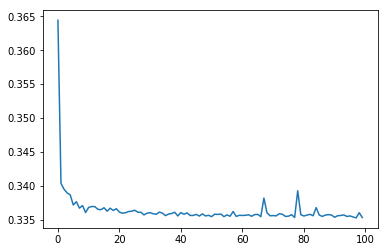

(5000, 4) (5000, 1)
(5000, 4) (5000, 1)
Confusion Matrix Train Data - Task 1 : 
[[   0    0    0  371]
 [   0    0    0   85]
 [   0    0    1  906]
 [   0    0    0 3637]]
Accuracy Score Train Data - Task 1 : 0.7276
Report Train Data - Task 1 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       371
           1       0.00      0.00      0.00        85
           2       1.00      0.00      0.00       907
           3       0.73      1.00      0.84      3637

   micro avg       0.73      0.73      0.73      5000
   macro avg       0.43      0.25      0.21      5000
weighted avg       0.71      0.73      0.61      5000
 samples avg       0.73      0.73      0.73      5000

Confusion Matrix Train Data - Task 2 : 
[[5000]]
Accuracy Score Train Data - Task 2 : 0.6854
Report Train Data - Task 2 : 
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      3427
           1       0.00      0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-p

In [0]:
predicted = model.predict([in2Vali[0:5000],in1Vali[0:5000]])

plt.plot(history.history['loss'])
plt.show()
[predA,predB] = predicted
print(predA.shape,predB.shape)
actA,actB = out2Vali[0:5000],out1Vali[0:5000]
actB = actB.reshape(5000,1)
print(actA.shape,actB.shape)
predA = (predA > 0.5)*1
predB = (predB > 0.5)*1

resultsA = confusion_matrix(actA.argmax(axis=1), predA.argmax(axis=1)) 
# confusionMatrix(resultsA)
f1_scoreAMi = f1_score(actA.argmax(axis=1), predA.argmax(axis=1), average = 'micro') 
f1_scoreAMa = f1_score(actA.argmax(axis=1), predA.argmax(axis=1), average = 'macro') 
# confusionMatrix(resultsA,f1_scoreAMi,f1_scoreAMa)
print('Confusion Matrix Train Data - Task 1 : ')
print(resultsA) 
print('Accuracy Score Train Data - Task 1 :',accuracy_score(actA, predA) )
print('Report Train Data - Task 1 : ')
print(classification_report(actA, predA) )
resultsB = confusion_matrix(actB.argmax(axis=1), predB.argmax(axis=1)) 
resultsB = confusion_matrix(actB.argmax(axis=1), predB.argmax(axis=1)) 
f1_scoreBMi = f1_score(actB.argmax(axis=1), predB.argmax(axis=1), average = 'micro') 
f1_scoreBMa = f1_score(actB.argmax(axis=1), predB.argmax(axis=1), average = 'macro') 
# confusionMatrix(resultsB,f1_scoreBMi,f1_scoreBMa)
print('Confusion Matrix Train Data - Task 2 : ')
print(resultsB) 
print('Accuracy Score Train Data - Task 2 :',accuracy_score(actB, predB) )
print('Report Train Data - Task 2 : ')
print(classification_report(actB, predB) )